### Q. 정류장 별 나가고 들어오는 자전거 수가 비슷한지?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
journeys = pd.read_csv('journeys.csv')
stations = pd.read_csv('stations.csv')

print(journeys.shape)
print(stations.shape)

journeys.head(2)

(1542844, 14)
(773, 5)


,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,Start Year,Start Hour,Start Minute,Start Station ID
0,2040.0,953,19,9,17,18,0,478,19,9,17,17,26,251
1,1800.0,12581,19,9,17,15,21,122,19,9,17,14,51,550


In [3]:
stations.head(2)

,Station ID,Capacity,Latitude,Longitude,Station Name
0,1,19,51.529163,-0.109970,"River Street , Clerkenwell"
1,2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"


In [4]:
# 끝 정류장에 대한 정보를 journeys에 추가
data = pd.merge(journeys, stations, left_on = 'End Station ID', right_on = 'Station ID', how = 'left')

# Station ID는 End Station ID와 동일하므로 삭제
data = data.drop(['Station ID'], axis = 1)

# 시작 정류장에 대한 정보도 추가해야되기 때문에 Column값 변경
data.rename(columns={"Capacity":"End Capacity", "Latitude":"End Latitude", "Longitude":"End Longitude", "Station Name":"End Station Name"},inplace = True)

# 시작 정류장에 대한 정보를 journeys에 추가
data = pd.merge(data, stations, left_on = 'Start Station ID', right_on = 'Station ID', how = 'left')

# Station ID는 Start Station ID와 동일하므로 삭제
data = data.drop(['Station ID'], axis = 1)

# Column값 변경
data.rename(columns={"Capacity":"Start Capacity", "Latitude":"Start Latitude", "Longitude":"Start Longitude", "Station Name":"Start Station Name"},inplace = True)

# 최종 데이터
print(data.shape)
data.head(2)

(1542844, 22)


,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,...,Start Minute,Start Station ID,End Capacity,End Latitude,End Longitude,End Station Name,Start Capacity,Start Latitude,Start Longitude,Start Station Name
0,2040.0,953,19,9,17,18,0,478,19,9,...,26,251,21.0,51.521889,-0.046670,"Stepney Green Station, Stepney",34.0,51.518908,-0.079249,"Brushfield Street, Liverpool Street"
1,1800.0,12581,19,9,17,15,21,122,19,9,...,51,550,23.0,51.521113,-0.078869,"Norton Folgate, Liverpool Street",23.0,51.521564,-0.039264,"Harford Street, Mile End"


In [5]:
# 정류장별 나가는 수
pd.pivot_table(data, index = 'Start Station ID', values = 'Journey Duration', aggfunc = 'count').head()

,Journey Duration
Start Station ID,
1,1269
2,2055
3,3337
4,1405
5,3335


In [6]:
# 정류장별 들어오는 수
pd.pivot_table(data, index = 'End Station ID', values = 'Journey Duration', aggfunc = 'count').head()

,Journey Duration
End Station ID,
1,877
2,2379
3,3786
4,1548
5,3596


In [7]:
# 정류장별 나가는 수 - 정류장별 들어오는 수
data_1 = pd.pivot_table(data, index = 'Start Station ID', values = 'Journey Duration', aggfunc = 'count') - pd.pivot_table(data, index = 'End Station ID', values = 'Journey Duration', aggfunc = 'count')
data_1 = data_1.rename(columns = {'Journey Duration' : 'Number of bicycles'})
data_1.head()

,Number of bicycles
Start Station ID,
1,392
2,-324
3,-449
4,-143
5,-261


In [8]:
data_1.describe()

,Number of bicycles
count,779.000000
mean,0.000000
std,294.470925
min,-3186.000000
25%,-59.000000
50%,12.000000
75%,93.000000
max,2005.000000


In [23]:
result = pd.merge(data_1, stations, left_on = 'Start Station ID', right_on = 'Station ID', how = 'left')

#result.to_csv('result.csv')
result.head()

,Number of bicycles,Station ID,Capacity,Latitude,Longitude,Station Name
0,392,1.0,19.0,51.529163,-0.109970,"River Street , Clerkenwell"
1,-324,2.0,37.0,51.499606,-0.197574,"Phillimore Gardens, Kensington"
2,-449,3.0,32.0,51.521283,-0.084605,"Christopher Street, Liverpool Street"
3,-143,4.0,23.0,51.530059,-0.120973,"St. Chad's Street, King's Cross"
4,-261,5.0,27.0,51.493130,-0.156876,"Sedding Street, Sloane Square"


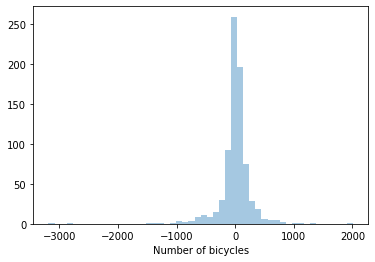

In [24]:
sns.distplot(result['Number of bicycles'],kde=False, rug=False)

#### 자전거의 출입수가 대략적으로 정규분포와 유사하다는 것을 알 수 있다.

#### 모든 정류장의 들어오고 나가는 수가 0에 수렴하지는 않는다.

#### 1시그마 밖에 있는 정류장들을 살펴보자

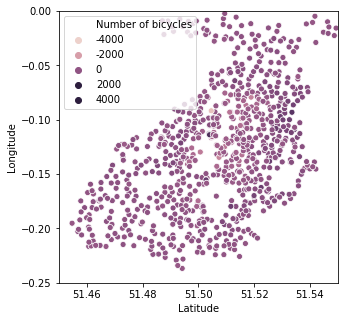

In [126]:
plt.figure(figsize=(5, 5))
plt.xlim(51.45,51.55)
plt.ylim(-0.25,0)
sns.scatterplot(x = 'Latitude',y = 'Longitude',hue = 'Number of bicycles', data = result)

#### 위도 경도에 따른 정류장 위치를 표시해주었고 그 위에다가 수 별로 색깔을 입혔습니다.
#### 자세히 보면 3시경 정류장들이 진한것을 알 수 있고, 바로 왼쪽의 정류장들의 색깔이 연한것을 볼 수 있습니다.
#### 진하다는 것(0보다 크다는 것)은 들어오는 수보다 나가는 수가 많다는 의미
#### 연하다는 것(0보다 작다는 것)은 나가는 수보다 들어오는 수가 많다는 의미

In [27]:
# 평균을 기준으로 양 옆으로 1시그마 밖으로 나온 값들의 데이터를 Outlier로 만들었습니다.
Outlier = pd.merge(data_1[data_1['Number of bicycles'].abs() > int(data_1.std()*1)], stations, left_on = 'Start Station ID', right_on = 'Station ID', how = 'left')
Outlier.head()

,Number of bicycles,Station ID,Capacity,Latitude,Longitude,Station Name
0,392,1,19,51.529163,-0.109970,"River Street , Clerkenwell"
1,-324,2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"
2,-449,3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street"
3,323,20,28,51.527736,-0.135273,"Drummond Street , Euston"
4,422,25,32,51.528833,-0.132250,"Doric Way , Somers Town"


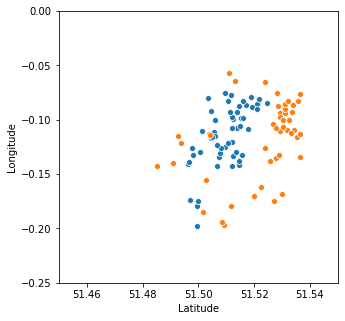

In [87]:
plt.figure(figsize=(5, 5))
plt.xlim(51.45,51.55)
plt.ylim(-0.25,0)
# 파란색 : 들어오는 수가 많은 정류장
sns.scatterplot(x = 'Latitude',y = 'Longitude',palette = 'Number of bicycles', data = Outlier[Outlier['Number of bicycles'] < 0])
# 주황색 : 나가는 수가 많은 정류장
sns.scatterplot(x = 'Latitude',y = 'Longitude',palette = 'Number of bicycles', data = Outlier[Outlier['Number of bicycles'] > 0])

#### 영국 지도에 대입시켜보면 런던 북쪽과 외곽에서 런던 시내(가운데)로 가는 것을 예상할 수 있습니다.

### 예상이 맞는지 확인

### 1. 나가는 수가 많은 정류장의 최종 목적지는 어디인지.

In [62]:
# 48개의 정류장
Outlier[Outlier['Number of bicycles'] > 0].shape

(48, 6)

In [71]:
data.sort_values(by = 'Start Station ID', inplace = True)

x = list(Outlier[Outlier['Number of bicycles'] > 0]['Station ID'])

def find_Start_Station_ID(data):
    for i in x:
        if data == i:
            return data

Start_Station = data[data['Start Station ID'].apply(find_Start_Station_ID) > 0]

print(Start_Station.shape)
Start_Station.head()

(120542, 22)


,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,...,Start Minute,Start Station ID,End Capacity,End Latitude,End Longitude,End Station Name,Start Capacity,Start Latitude,Start Longitude,Start Station Name
1457753,1640.0,7165,5,8,17,11,30,251,5,8,...,3,1,34.0,51.518908,-0.079249,"Brushfield Street, Liverpool Street",19.0,51.529163,-0.10997,"River Street , Clerkenwell"
1095013,372.0,7068,22,8,17,18,24,574,22,8,...,17,1,45.0,51.533560,-0.093150,"Eagle Wharf Road, Hoxton",19.0,51.529163,-0.10997,"River Street , Clerkenwell"
479691,1140.0,738,31,8,17,19,58,815,31,8,...,39,1,35.0,51.500089,-0.116628,"Lambeth Palace Road, Waterloo",19.0,51.529163,-0.10997,"River Street , Clerkenwell"
1235460,725.0,5823,12,8,17,16,52,88,12,8,...,40,1,25.0,51.518587,-0.132053,"Bayley Street , Bloomsbury",19.0,51.529163,-0.10997,"River Street , Clerkenwell"
1064892,65.0,394,21,8,17,19,8,254,21,8,...,7,1,17.0,51.530515,-0.106408,"Chadwell Street, Angel",19.0,51.529163,-0.10997,"River Street , Clerkenwell"


- 위의 48개의 정류장에서 나가는 데이터 수가 120542개

In [110]:
# 최종 목적지를 기준으로 카운트
Start_Station = pd.pivot_table(Start_Station, index = 'End Station ID', values = 'Journey Duration', aggfunc = 'count')

Start_Station = pd.merge(Start_Station, stations, left_on = 'End Station ID', right_on = 'Station ID', how = 'left')

Start_Station.rename(columns = {'Journey Duration':'Count'}, inplace = True)

Start_Station.head()

,Count,Station ID,Capacity,Latitude,Longitude,Station Name
0,196,1.0,19.0,51.529163,-0.109970,"River Street , Clerkenwell"
1,77,2.0,37.0,51.499606,-0.197574,"Phillimore Gardens, Kensington"
2,813,3.0,32.0,51.521283,-0.084605,"Christopher Street, Liverpool Street"
3,157,4.0,23.0,51.530059,-0.120973,"St. Chad's Street, King's Cross"
4,138,5.0,27.0,51.493130,-0.156876,"Sedding Street, Sloane Square"


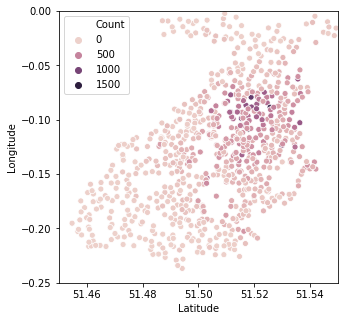

In [111]:
# 48개의 정류장에서 출발했을때 최종 목적지를 나타냄
# 주로 런던시내(가운데)가 많은 것을 볼 수 있다.

plt.figure(figsize=(5, 5))
plt.xlim(51.45,51.55)
plt.ylim(-0.25,0)
sns.scatterplot(x = 'Latitude',y = 'Longitude',hue = 'Count', data = Start_Station)

In [112]:
Start_Station['Count'].describe()

count     774.000000
mean      155.739018
std       183.065514
min         1.000000
25%        33.000000
50%        93.000000
75%       212.750000
max      1405.000000
Name: Count, dtype: float64

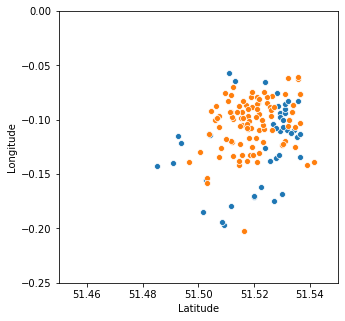

In [121]:
# 48개의 주요 최종목적지를 확인하기 위해서 평균 + 1시그마보다 큰 수의 정류장들만 SS로 저장
SS = Start_Station[Start_Station['Count'] > (Start_Station['Count'].mean() + Start_Station['Count'].std())]

plt.figure(figsize=(5, 5))
plt.xlim(51.45,51.55)
plt.ylim(-0.25,0)

# 파란색 : 나가는 수가 많은 정류장
sns.scatterplot(x = 'Latitude',y = 'Longitude',palette = 'Number of bicycles', data = Outlier[Outlier['Number of bicycles'] > 0])
# 주황색 : 파란색들의 주요 최종 목적지
sns.scatterplot(x = 'Latitude',y = 'Longitude',cmap = 'Count', data = SS)

#### 주로 런던 북쪽 그리고 외곽에서 가운데로 오는 것을 확인 => 런던 시내로 모이는 것을 확인할 수 있다.


### 2. 들어오는 수가 많은 정류장의 시작이 어디인지.

In [94]:
# 55개의 정류장
Outlier[Outlier['Number of bicycles'] < 0].shape

(55, 6)

In [102]:
data.sort_values(by = 'End Station ID', inplace = True)

x = list(Outlier[Outlier['Number of bicycles'] < 0]['Station ID'])

def find_End_Station_ID(data):
    for i in x:
        if data == i:
            return data

End_Station = data[data['End Station ID'].apply(find_End_Station_ID) > 0]

print(End_Station.shape)
End_Station.head()

(242066, 22)


,Journey Duration,Journey ID,End Date,End Month,End Year,End Hour,End Minute,End Station ID,Start Date,Start Month,...,Start Minute,Start Station ID,End Capacity,End Latitude,End Longitude,End Station Name,Start Capacity,Start Latitude,Start Longitude,Start Station Name
923444,455.0,2567,16,8,17,19,41,2,16,8,...,33,350,37.0,51.499606,-0.197574,"Phillimore Gardens, Kensington",21.0,51.501715,-0.179854,"Queen's Gate, Kensington Gardens"
929312,807.0,11443,17,8,17,6,57,2,17,8,...,44,191,37.0,51.499606,-0.197574,"Phillimore Gardens, Kensington",28.0,51.503117,-0.153520,"Hyde Park Corner, Hyde Park"
1385675,1226.0,5943,3,8,17,7,38,2,3,8,...,17,612,37.0,51.499606,-0.197574,"Phillimore Gardens, Kensington",30.0,51.469259,-0.141812,"Wandsworth Rd, Isley Court, Wandsworth Road"
714031,2996.0,8567,25,8,17,19,52,2,25,8,...,2,559,37.0,51.499606,-0.197574,"Phillimore Gardens, Kensington",24.0,51.501391,-0.205991,"Abbotsbury Road, Holland Park"
353308,1080.0,13782,9,9,17,14,20,2,9,9,...,2,47,37.0,51.499606,-0.197574,"Phillimore Gardens, Kensington",19.0,51.523344,-0.183846,"Warwick Avenue Station, Maida Vale"


- 위의 55개의 정류장으로 들어오는 데이터 수가 242066개

In [103]:
# 시작 목적지를 기준으로 카운트
End_Station = pd.pivot_table(End_Station, index = 'Start Station ID', values = 'Journey Duration', aggfunc = 'count')

End_Station = pd.merge(End_Station, stations, left_on = 'Start Station ID', right_on = 'Station ID', how = 'left')

End_Station.rename(columns = {'Journey Duration':'Count'}, inplace = True)

print(End_Station.shape)
End_Station.head()

(778, 6)


,Count,Station ID,Capacity,Latitude,Longitude,Station Name
0,277,1.0,19.0,51.529163,-0.109970,"River Street , Clerkenwell"
1,232,2.0,37.0,51.499606,-0.197574,"Phillimore Gardens, Kensington"
2,552,3.0,32.0,51.521283,-0.084605,"Christopher Street, Liverpool Street"
3,284,4.0,23.0,51.530059,-0.120973,"St. Chad's Street, King's Cross"
4,305,5.0,27.0,51.493130,-0.156876,"Sedding Street, Sloane Square"


- 778개의 정류장에서 출발하는 것을 알 수 있다.

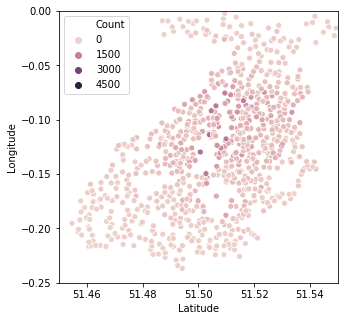

In [105]:
# 55개의 정류장으로 갈 때 출발 목적지

plt.figure(figsize=(5, 5))
plt.xlim(51.45,51.55)
plt.ylim(-0.25,0)
sns.scatterplot(x = 'Latitude',y = 'Longitude', hue = 'Count', data = End_Station)

In [106]:
End_Station['Count'].describe()

count     778.000000
mean      311.138817
std       351.510777
min         3.000000
25%        90.250000
50%       214.000000
75%       415.000000
max      4130.000000
Name: Count, dtype: float64

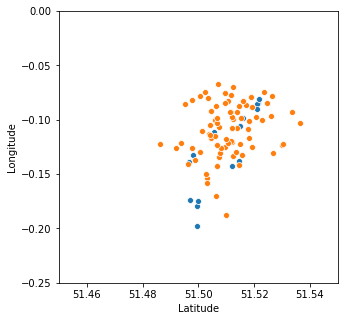

In [137]:
# 55개의 주요 시작목적지를 확인하기 위해서 평균 + 1시그마보다 큰 수의 정류장들만 ES로 저장
ES = End_Station[End_Station['Count'] > (End_Station['Count'].mean() + End_Station['Count'].std())]

plt.figure(figsize=(5, 5))
plt.xlim(51.45,51.55)
plt.ylim(-0.25,0)
# 주황색 : 들어오는 수가 많은 정류장
sns.scatterplot(x = 'Latitude',y = 'Longitude',palette = 'Number of bicycles', data = Outlier[Outlier['Number of bicycles'] < 0])
# 파란색 : 주황색의 시작지점
sns.scatterplot(x = 'Latitude',y = 'Longitude',cmap = 'Count', data = ES)

#### 위의 그래프를 봤을 때는 시작지점에서 최종 목적지는 주로 런던 시내임을 알 수 있습니다.

## 따라서 나가는 수 또는 들어오는 수가 0과 거리가 있는 정류장들의 움직임을 보면 주로 런던 외곽에서 런던 시내로 이동하는 것을 알 수 있습니다.